In [1]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

In [2]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2022-11-29T00:00:00") #end time of the request
minLat = 33
maxLat = 42
minLon = -125 
maxLon = -114
minMag = 3.0 

catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat, 
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag) 

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

print("\nNumber of Earthquakes >=3.0 in CA since 1970:", len(catalog))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2022-11-30 16:44:10.985565
Download ended:  2022-11-30 16:44:58.576780

Number of Earthquakes >=3.0 in CA since 1970: 22354


In [3]:
long_list = np.zeros(len(catalog))
lat_list = np.zeros(len(catalog))

for i in range(len(catalog)):
    long_list[i] = catalog[i].origins[0].longitude
    lat_list[i] = catalog[i].origins[0].latitude

/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


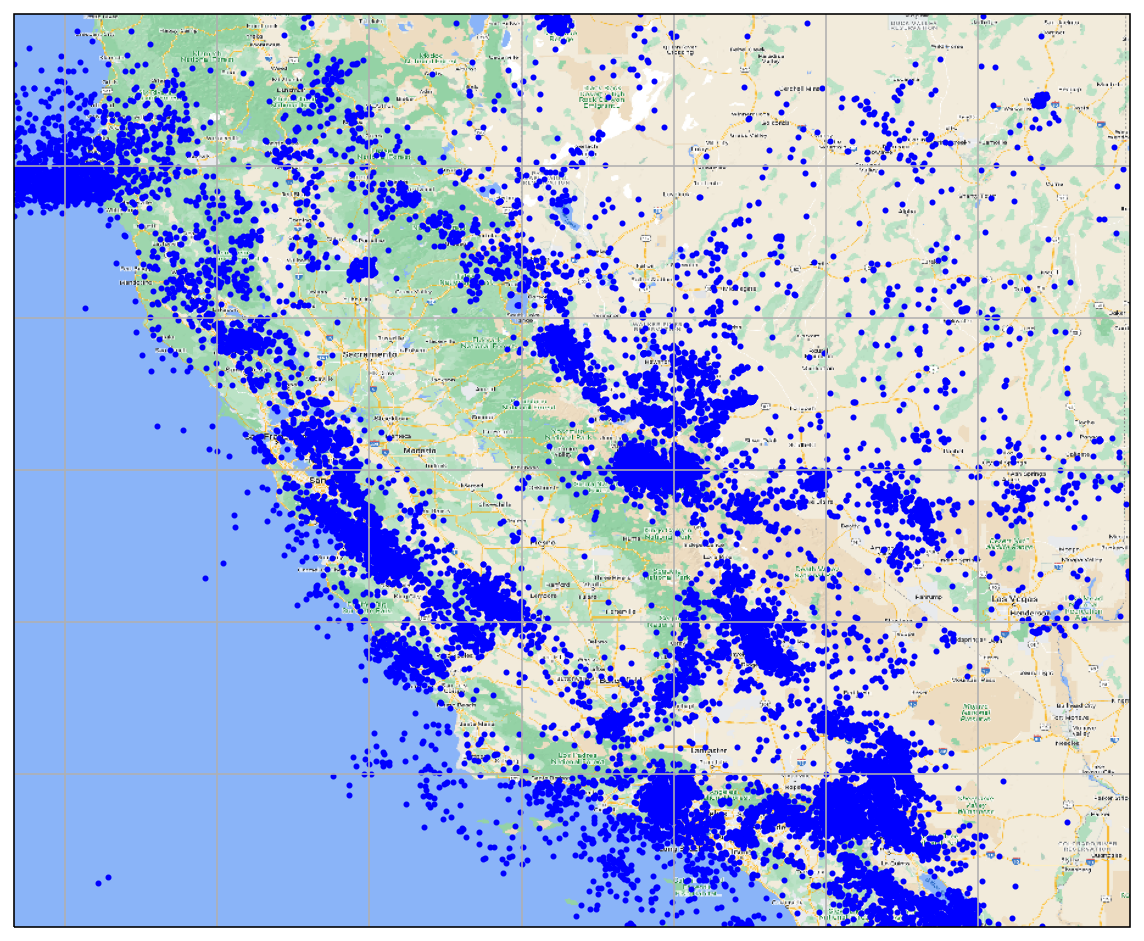

In [4]:
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_list, lat_list, c='b',s=4,transform=ccrs.PlateCarree())

<BarContainer object of 53 artists>

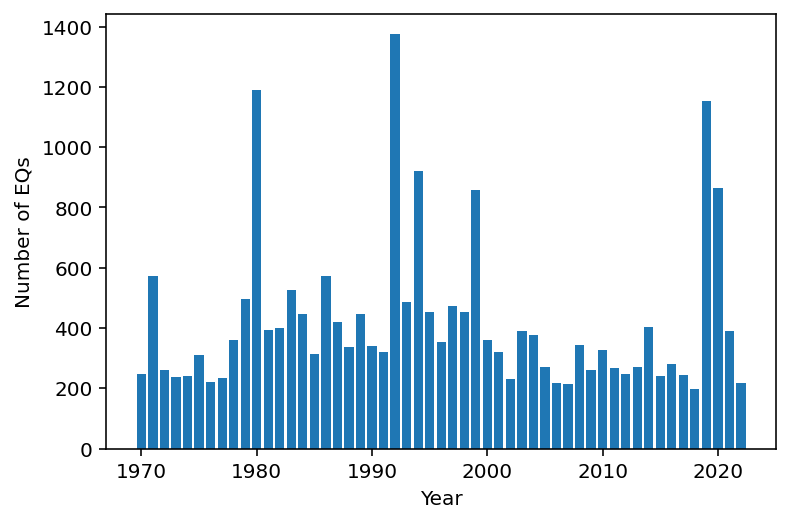

In [5]:
years = np.arange(1970, 2023, 1)
EQs = np.zeros(len(years))

for j in range(len(catalog)):
    event_yr = catalog[j].origins[0].time.year
    index = event_yr - 1970
    EQs[index] += 1
    
plt.xlabel("Year")
plt.ylabel("Number of EQs")
plt.bar(years, EQs)

In [6]:
aftershocks = 0
seconds = 86400
R = 6371 #Earth's radius in km
long_dist = []
lat_dist = []
for i in range(0, len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    timeDiffInSec = catalog[0].origins[0].time - catalog[i].origins[0].time
    for j in range(i+1, len(catalog)):
        latj = catalog[j].origins[0].latitude
        longj = catalog[j].origins[0].longitude
        timeDiffInSecj = catalog[0].origins[0].time - catalog[j].origins[0].time
        if (abs(timeDiffInSec - timeDiffInSecj) < seconds):
            
            #compute distances 
            lat = lat * 1 / (2 * np.pi * R / 360)
            latj = latj * 1 / (2 * np.pi * R / 360)
            long = long * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            longj = longj * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            x_dist = abs(lat - latj)
            y_dist = abs(long - longj)
            
            dist = np.sqrt(x_dist**2 + y_dist**2)
            
            if (dist < 10):
                checklat = catalog[j].origins[0].latitude
                checklong = catalog[j].origins[0].longitude
                if (checklat not in lat_dist or checklong not in long_dist):
                    aftershocks += 1
                    lat_dist.append(catalog[j].origins[0].latitude)
                    long_dist.append(catalog[j].origins[0].longitude)

print(aftershocks)
print(f'Probability of an aftershock after {seconds/60/60/24} days(s) = {aftershocks/len(catalog)}')

14933
Probability of an aftershock after 1.0 days(s) = 0.6680236199337926


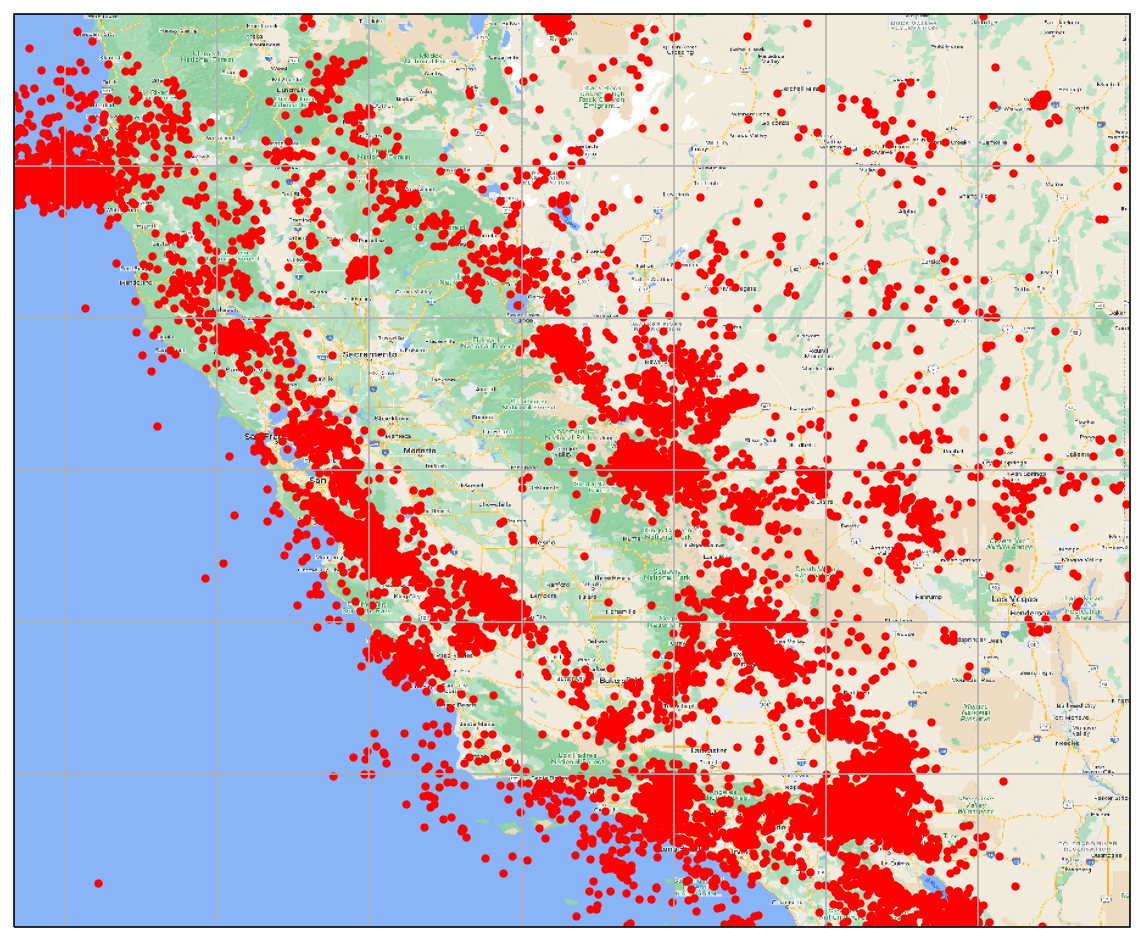

In [7]:
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_dist, lat_dist, c='r',s=10,transform=ccrs.PlateCarree())

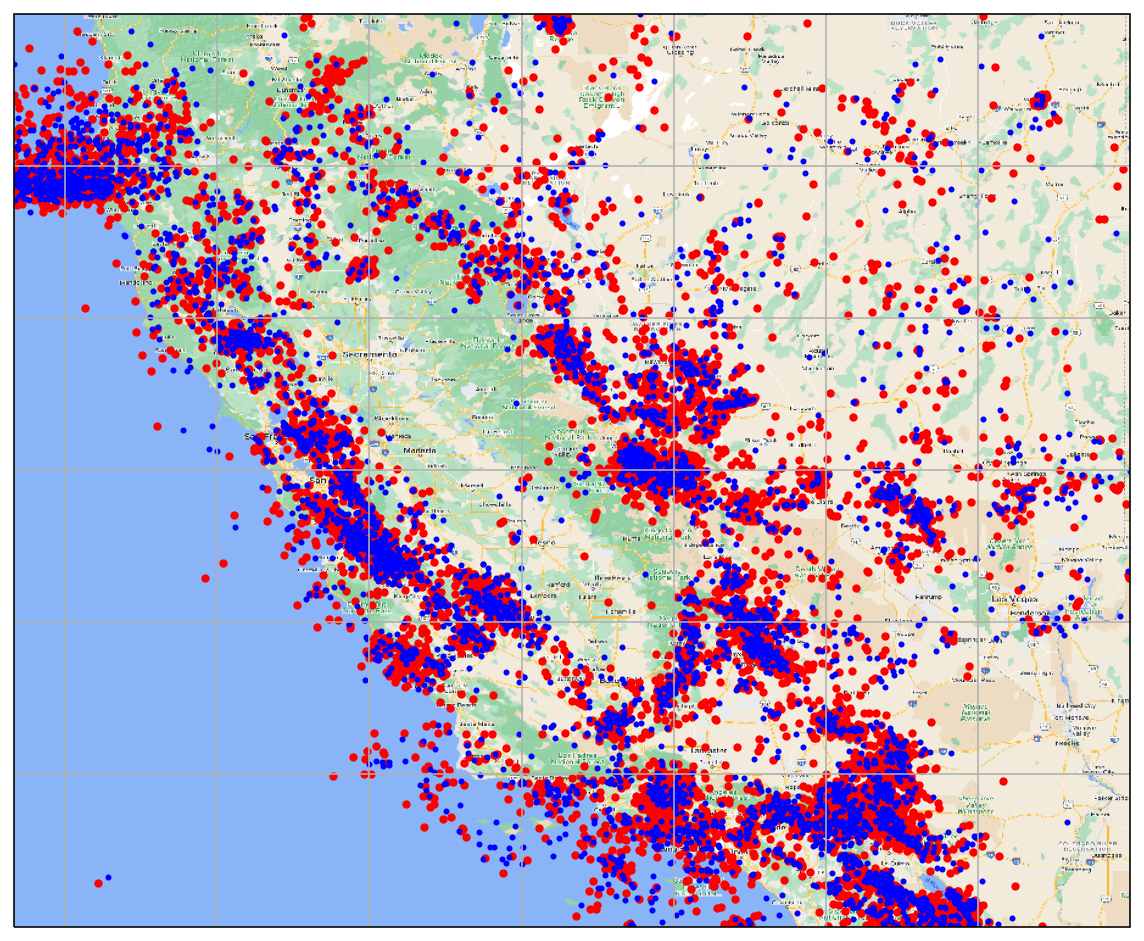

In [8]:
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_dist, lat_dist, c='r',s=10,transform=ccrs.PlateCarree())

lo = []
la = []

for i in range(len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    if (lat in lat_dist and long in long_dist):
        continue
    else:
        lo.append(long)
        la.append(lat)
        
ax.scatter(lo, la, c='b',s=4,transform=ccrs.PlateCarree())

In [9]:
#Cluster is around bridgeport/Willow springs in the center
#Left center is near Pope Valley
#Near the 6 Freeway leading out of california is that huge cluster however

In [10]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2022-11-29T00:00:00") #end time of the request
minLat = 37.3
maxLat = 38
minLon = -123
maxLon = -122.1
minMag = 3.0 

catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat, 
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag) 

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

print("\nNumber of Earthquakes >=3.0 in SF since 1970:", len(catalog))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2022-11-30 16:57:41.352979
Download ended:  2022-11-30 16:57:46.649600

Number of Earthquakes >=3.0 in SF since 1970: 156


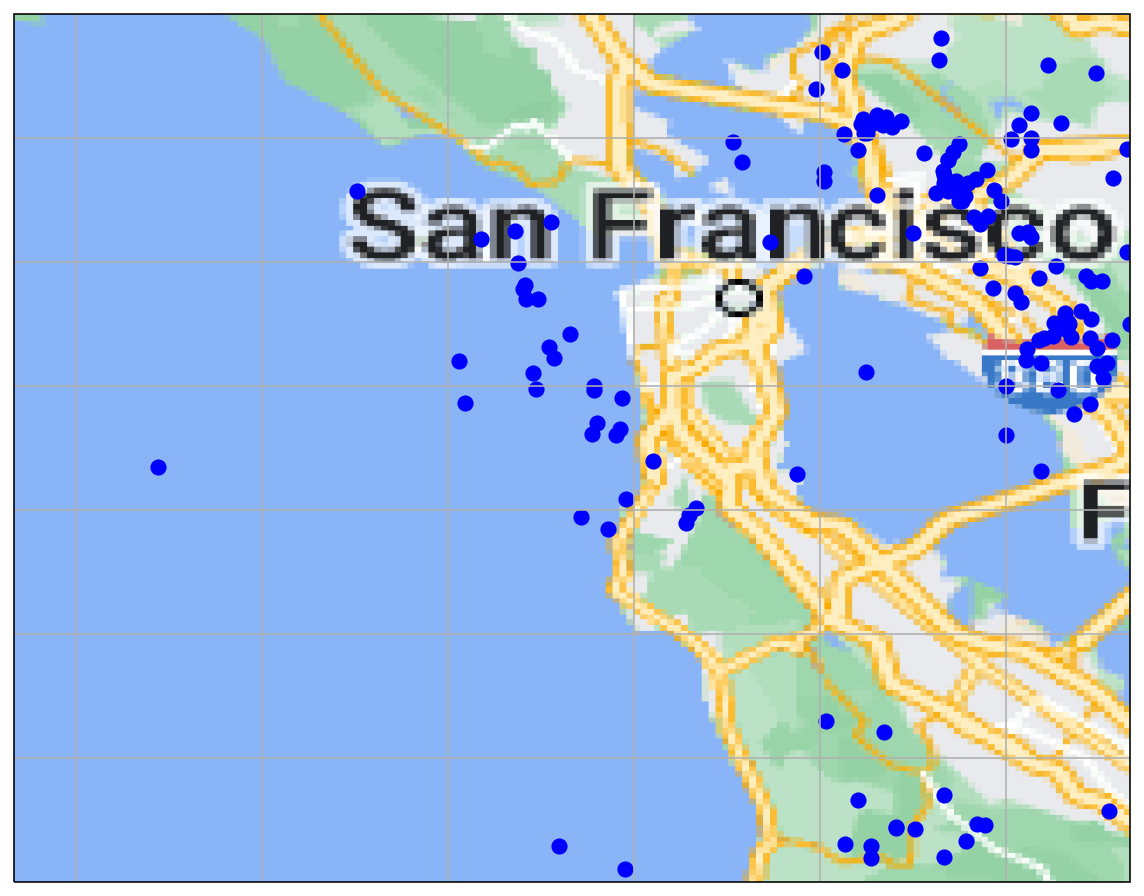

In [11]:
long_list = np.zeros(len(catalog))
lat_list = np.zeros(len(catalog))

for i in range(len(catalog)):
    long_list[i] = catalog[i].origins[0].longitude
    lat_list[i] = catalog[i].origins[0].latitude
    
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_list, lat_list, c='b',s=50,transform=ccrs.PlateCarree())

22
Probability of an aftershock after 1.0 days(s) = 0.14102564102564102


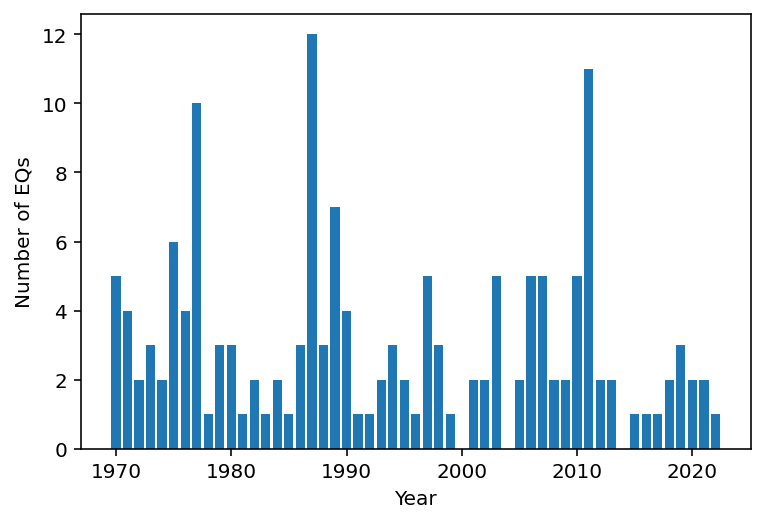

In [12]:
years = np.arange(1970, 2023, 1)
EQs = np.zeros(len(years))

for j in range(len(catalog)):
    event_yr = catalog[j].origins[0].time.year
    index = event_yr - 1970
    EQs[index] += 1
    
plt.xlabel("Year")
plt.ylabel("Number of EQs")
plt.bar(years, EQs)

aftershocks = 0
seconds = 86400
R = 6371 #Earth's radius in km
long_dist = []
lat_dist = []
for i in range(0, len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    timeDiffInSec = catalog[0].origins[0].time - catalog[i].origins[0].time
    for j in range(i+1, len(catalog)):
        latj = catalog[j].origins[0].latitude
        longj = catalog[j].origins[0].longitude
        timeDiffInSecj = catalog[0].origins[0].time - catalog[j].origins[0].time
        if (abs(timeDiffInSec - timeDiffInSecj) < seconds):
            
            #compute distances 
            lat = lat * 1 / (2 * np.pi * R / 360)
            latj = latj * 1 / (2 * np.pi * R / 360)
            long = long * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            longj = longj * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            x_dist = abs(lat - latj)
            y_dist = abs(long - longj)
            
            dist = np.sqrt(x_dist**2 + y_dist**2)
            
            if (dist < 10):
                checklat = catalog[j].origins[0].latitude
                checklong = catalog[j].origins[0].longitude
                if (checklat not in lat_dist or checklong not in long_dist):
                    aftershocks += 1
                    lat_dist.append(catalog[j].origins[0].latitude)
                    long_dist.append(catalog[j].origins[0].longitude)

print(aftershocks)
print(f'Probability of an aftershock after {seconds/60/60/24} days(s) = {aftershocks/len(catalog)}')

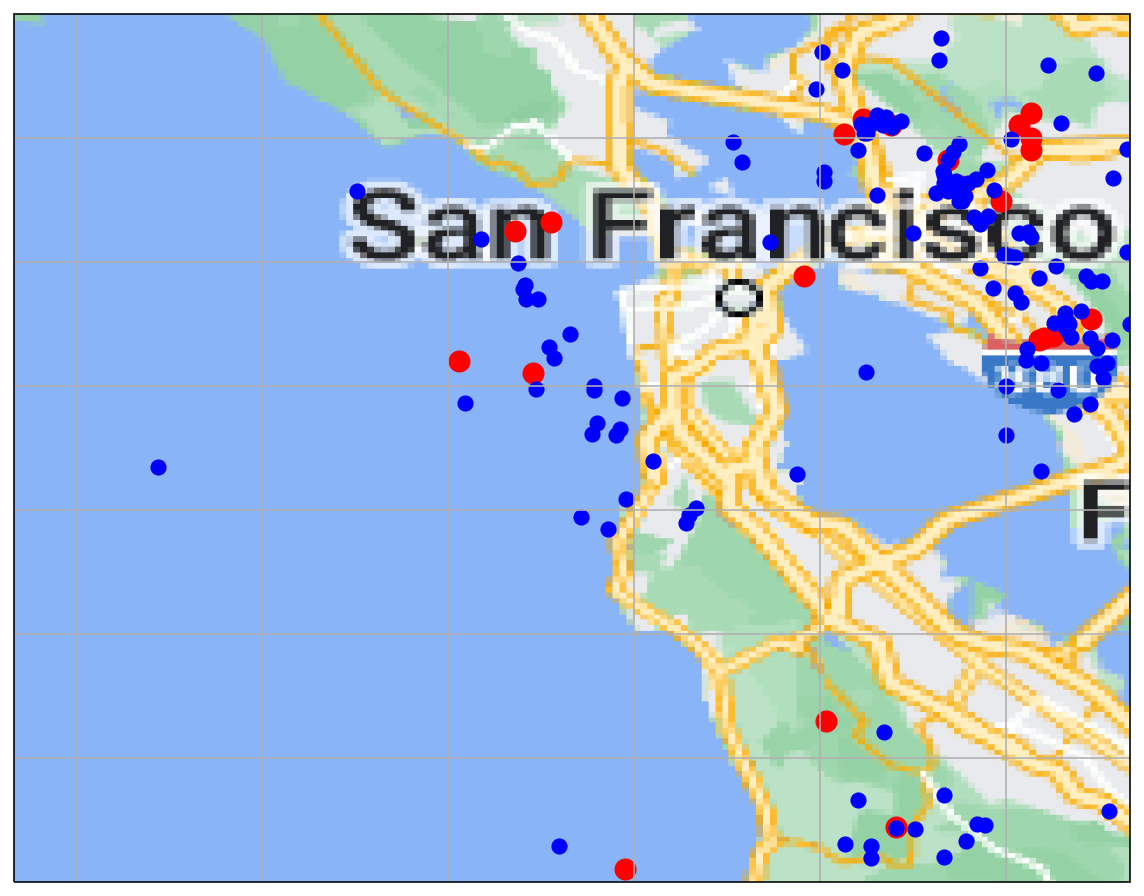

In [13]:
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_dist, lat_dist, c='r',s=100,transform=ccrs.PlateCarree())

lo = []
la = []

for i in range(len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    if (lat in lat_dist and long in long_dist):
        continue
    else:
        lo.append(long)
        la.append(lat)
        
ax.scatter(lo, la, c='b',s=50,transform=ccrs.PlateCarree())

/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


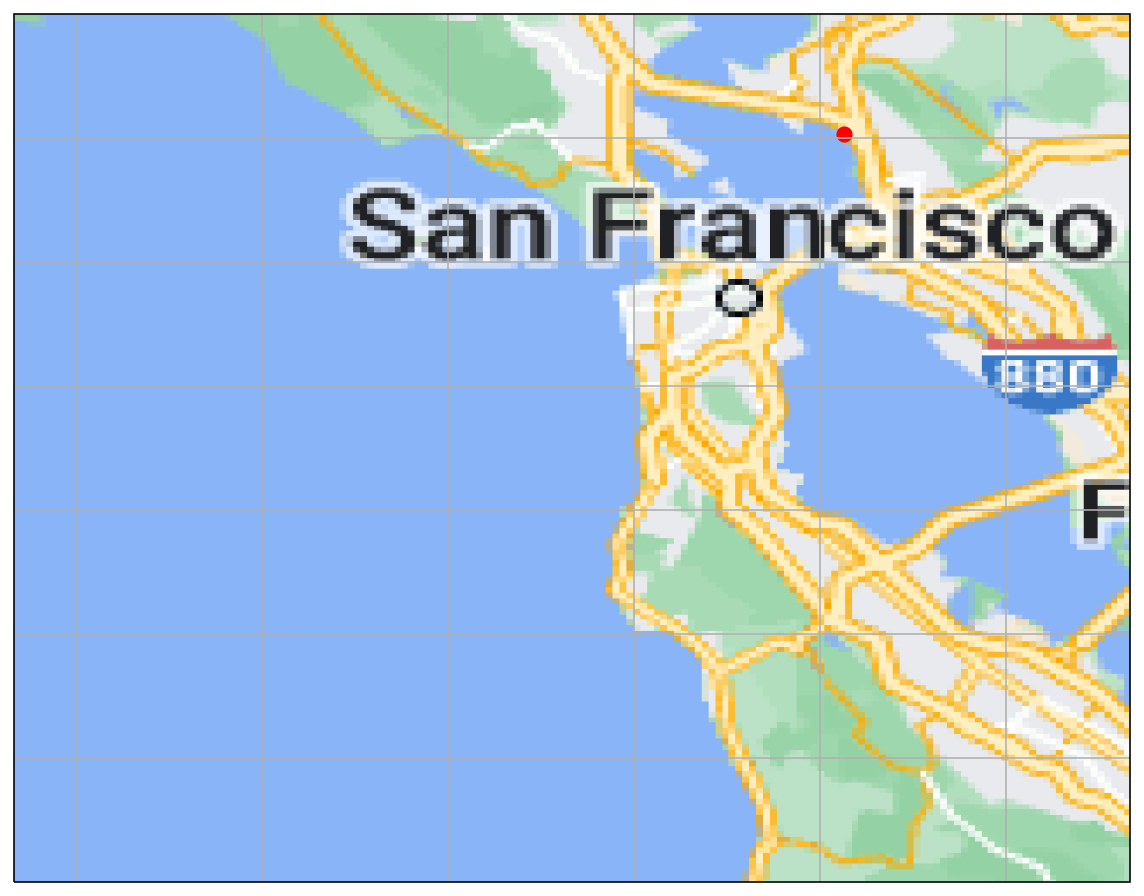

In [14]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title = 'SF Aftershocks', artist='matplot', comment='Aftershocks')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure(figsize=(10,10)) 

with writer.saving(fig, "Californian_Faults2.mp4", dpi=200):
    
    fig.clear()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
    ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
    ax.gridlines() 

    import cartopy.io.img_tiles as cimgt 
    request = cimgt.GoogleTiles() 
    ax.add_feature(cfeature.BORDERS, linestyle=':') 
    ax.add_image(request, 8) 
    
    for i in range(len(long_dist)):
        ax.scatter(long_dist[i:i+1], lat_dist[i:i+1], c='r',s=50,transform=ccrs.PlateCarree())
        plt.pause(0.05)
        writer.grab_frame()
    for i in range(len(lo)):
        ax.scatter(lo[i:i+1], la[i:i+1], c='b',s=50,transform=ccrs.PlateCarree())
        plt.pause(0.05)
        writer.grab_frame()


In [15]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2022-11-29T00:00:00") #end time of the request
minLat = 33.8
maxLat = 34.2
minLon = -118.7
maxLon = -117.8
minMag = 3.0 

catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat, maxlatitude=maxLat, 
minlongitude=minLon, maxlongitude=maxLon, minmagnitude=minMag) 

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

print("\nNumber of Earthquakes >=3.0 in LA since 1970:", len(catalog))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2022-11-30 16:58:34.842828
Download ended:  2022-11-30 16:58:39.796659

Number of Earthquakes >=3.0 in LA since 1970: 379


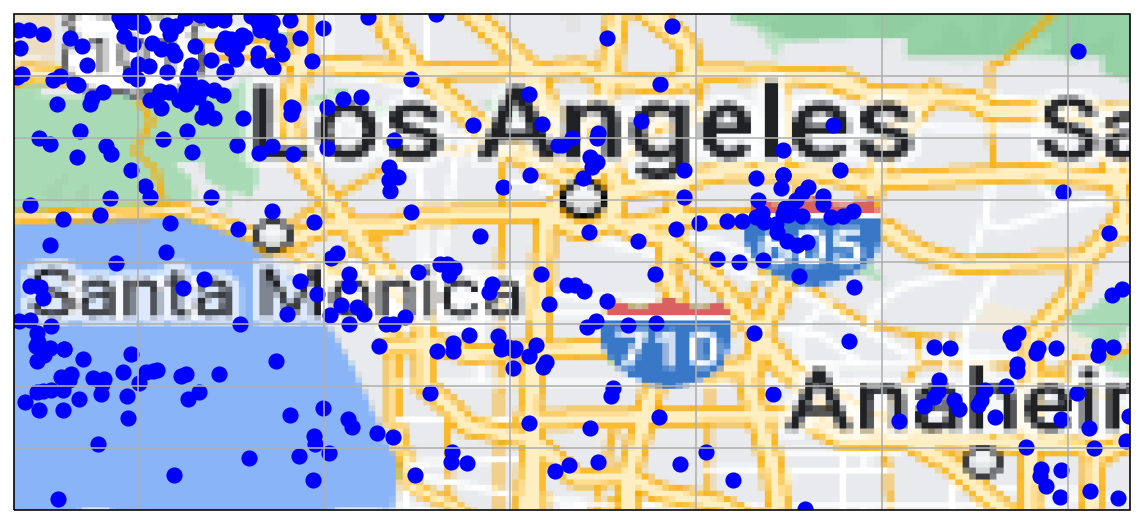

In [16]:
long_list = np.zeros(len(catalog))
lat_list = np.zeros(len(catalog))

for i in range(len(catalog)):
    long_list[i] = catalog[i].origins[0].longitude
    lat_list[i] = catalog[i].origins[0].latitude
    
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_list, lat_list, c='b',s=50,transform=ccrs.PlateCarree())

171
Probability of an aftershock after 1.0 days(s) = 0.45118733509234826


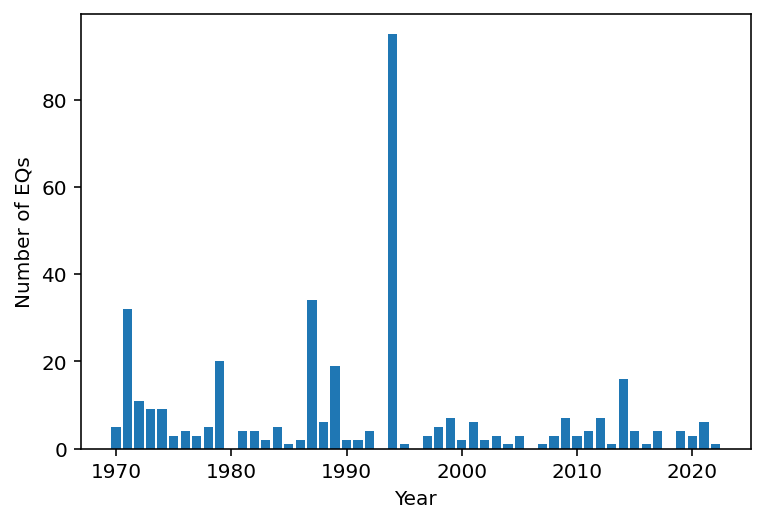

In [17]:
years = np.arange(1970, 2023, 1)
EQs = np.zeros(len(years))

for j in range(len(catalog)):
    event_yr = catalog[j].origins[0].time.year
    index = event_yr - 1970
    EQs[index] += 1
    
plt.xlabel("Year")
plt.ylabel("Number of EQs")
plt.bar(years, EQs)

aftershocks = 0
seconds = 86400
R = 6371 #Earth's radius in km
long_dist = []
lat_dist = []
for i in range(0, len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    timeDiffInSec = catalog[0].origins[0].time - catalog[i].origins[0].time
    for j in range(i+1, len(catalog)):
        latj = catalog[j].origins[0].latitude
        longj = catalog[j].origins[0].longitude
        timeDiffInSecj = catalog[0].origins[0].time - catalog[j].origins[0].time
        if (abs(timeDiffInSec - timeDiffInSecj) < seconds):
            
            #compute distances 
            lat = lat * 1 / (2 * np.pi * R / 360)
            latj = latj * 1 / (2 * np.pi * R / 360)
            long = long * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            longj = longj * 1 / (np.pi * R * np.cos(np.pi / 180 * 35.5) / 180)
            x_dist = abs(lat - latj)
            y_dist = abs(long - longj)
            
            dist = np.sqrt(x_dist**2 + y_dist**2)
            
            if (dist < 10):
                checklat = catalog[j].origins[0].latitude
                checklong = catalog[j].origins[0].longitude
                if (checklat not in lat_dist or checklong not in long_dist):
                    aftershocks += 1
                    lat_dist.append(catalog[j].origins[0].latitude)
                    long_dist.append(catalog[j].origins[0].longitude)

print(aftershocks)
print(f'Probability of an aftershock after {seconds/60/60/24} days(s) = {aftershocks/len(catalog)}')

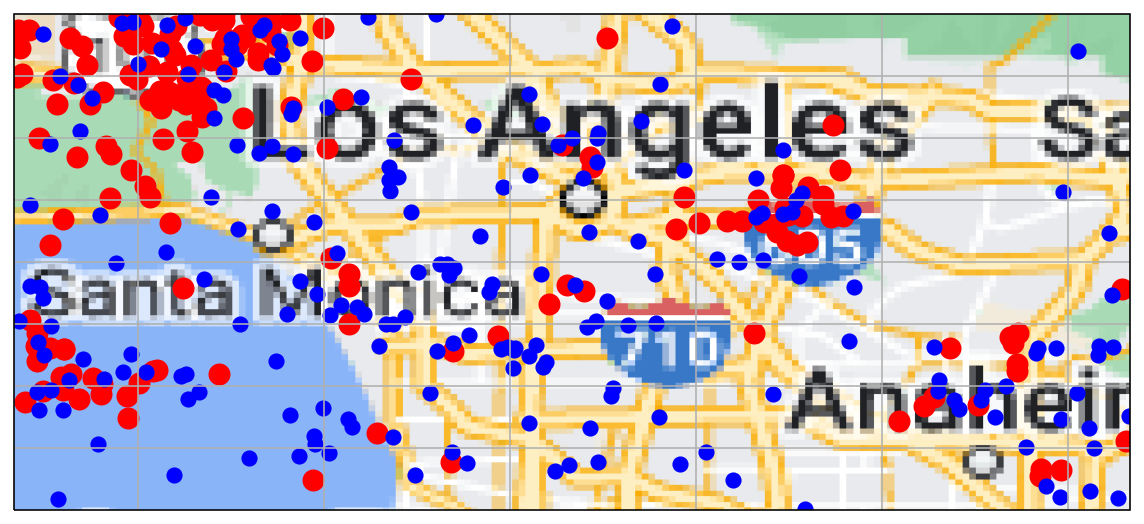

In [18]:
fig = plt.figure(figsize=(10,10)) 
 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(long_dist, lat_dist, c='r',s=100,transform=ccrs.PlateCarree())

lo = []
la = []

for i in range(len(catalog)):
    lat = catalog[i].origins[0].latitude
    long = catalog[i].origins[0].longitude
    if (lat in lat_dist and long in long_dist):
        continue
    else:
        lo.append(long)
        la.append(lat)
        
ax.scatter(lo, la, c='b',s=50,transform=ccrs.PlateCarree())

/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xamnshadow/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


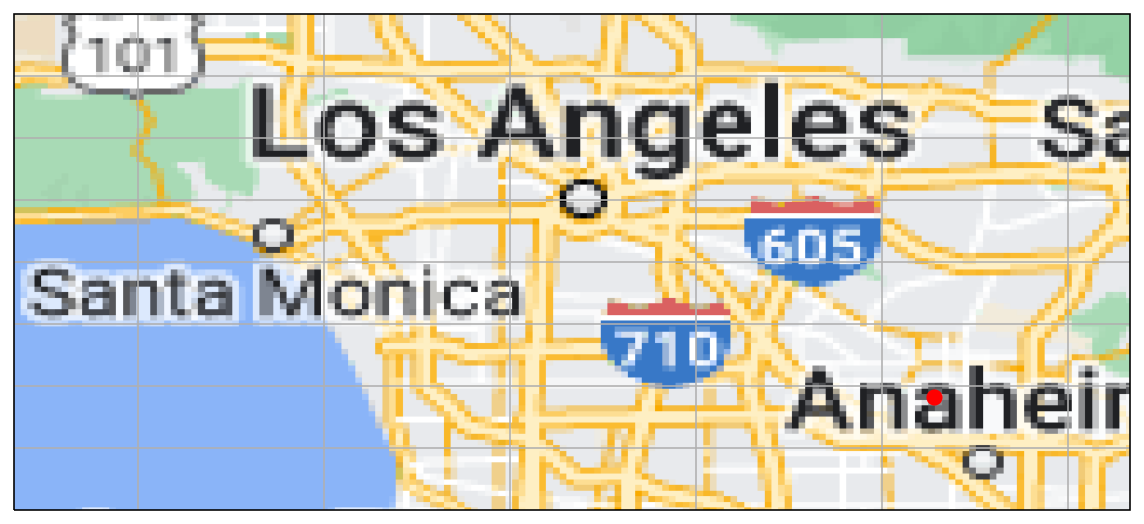

In [19]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title = 'LA Aftershocks', artist='matplot', comment='Aftershocks')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure(figsize=(10,10)) 

with writer.saving(fig, "Californian_Faults1.mp4", dpi=200):
    
    fig.clear()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
    ax.set_extent([minLon,maxLon,minLat,maxLat], crs=ccrs.PlateCarree()) 
    ax.gridlines() 

    import cartopy.io.img_tiles as cimgt 
    request = cimgt.GoogleTiles() 
    ax.add_feature(cfeature.BORDERS, linestyle=':') 
    ax.add_image(request, 8) 
    
    for i in range(len(long_dist)):
        ax.scatter(long_dist[i:i+1], lat_dist[i:i+1], c='r',s=50,transform=ccrs.PlateCarree())
        plt.pause(0.05)
        writer.grab_frame()
    for i in range(len(lo)):
        ax.scatter(lo[i:i+1], la[i:i+1], c='b',s=50,transform=ccrs.PlateCarree())
        plt.pause(0.05)
        writer.grab_frame()


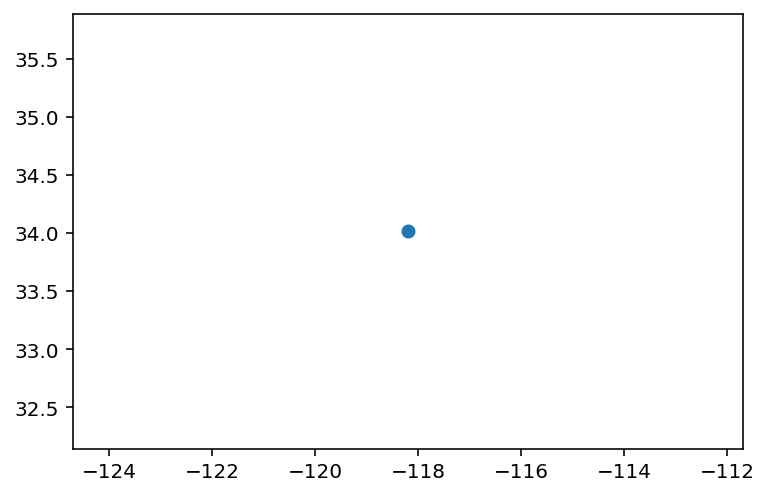

range(0, 207)


In [20]:
plt.scatter(lo[0], la[1])
plt.show()

print(range(len(lo)))